# Berg - Pre- and Post-Processing module

**To do:**
- Check if order of GSD classes is preserved while doing the back calculation
- Check strange occurence of ca. 85% for z_1000 in GZ layer
- Check method overall

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import os
import re
import xarray

In [2]:
# Import local package
from compositional_data_kriging import pre_post_processing as ppp
from compositional_data_kriging import cross_validation as cv

In [3]:
# Load jupyter extension to reload packages before executing user code.
# https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
%load_ext autoreload

In [4]:
# Reload all packages (except those excluded by %aimport) every time before executing the Python code typed.
%autoreload 2

In [5]:
# Load extension to profile functions inline
%load_ext line_profiler

___

## Debug test

**To check:**
- Values that were used as input are correctly calculated after PPP module (new approach): TRUE

In [223]:
Debug_test = ppp.pre_processing_debug("../_DATA/Debug_test/Debugging_test1.xlsx", save_data=True, save_name="Test")

['Sheet2']
PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
[  5.94568356e-01   2.29844137e-01   1.17904647e-01   5.76828596e-02
   7.39181140e-33]
10
0.594568356147
0.229844137186
0.117904647065
0.0576828596017
7.3918113954e-33
4 PCA components with variance sum 1.0 needed for obtaining sum of variance > 0.95
Sheet2
PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
           z_1000     z_710     z_500     z_355     z_250     z_180     z_125  \
hole_id                                                                         
1        0.459084  0.247886  0.623383 -0.530668 -0.269239 -0.130242  0.840218   
3        0.680100 -0.537915 -1.033115  0.368721 -0.395876 -0.121205 -0.041370   
5       -0.985128  0.555213 -0.052917  0.643109  1.253040  0.389851  1.110087   
7        1.203335 -0.330312  1.154250  1.243980 -0.024213 -0.599274 -1.113260   
9        0

In [222]:
Debug_test2 = ppp.pre_processing_debug("../_DATA/Debug_test/Debugging_test2.xlsx", save_data=True, save_name="Test2")

['Sheet2']
PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
[  3.01890377e-01   1.99393037e-01   1.85646856e-01   1.21745665e-01
   9.62753235e-02   4.63181015e-02   2.31214935e-02   1.89238991e-02
   6.68524770e-03   8.62698973e-33]
10
0.30189037719
0.199393036802
0.18564685613
0.121745664594
0.0962753234638
0.0463181014971
0.0231214935356
0.018923899082
0.0066852477049
8.6269897308e-33
6 PCA components with variance sum 0.951269359678 needed for obtaining sum of variance > 0.95
Sheet2
PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
           z_1000     z_710     z_500     z_355     z_250     z_180     z_125  \
hole_id                                                                         
2        0.684972  0.792716  0.695753  0.618313  0.841678  0.868525  0.832375   
4        0.656723  0.346121 -0.731699  0.369487 -0.051665  0.332177  0.742447 

In [17]:
Debug_test

[{'Sheet2':            z_1000     z_710     z_500     z_355     z_250     z_180     z_125  \
  hole_id                                                                         
  1        0.459084  0.247886  0.623383 -0.530668 -0.269239 -0.130242  0.840218   
  3        0.680100 -0.537915 -1.033115  0.368721 -0.395876 -0.121205 -0.041370   
  5       -0.985128  0.555213 -0.052917  0.643109  1.253040  0.389851  1.110087   
  7        1.203335 -0.330312  1.154250  1.243980 -0.024213 -0.599274 -1.113260   
  9        0.264300  0.410113 -0.758513  1.043401 -0.033104 -0.994396  1.054191   
  
               z_90      z_63       z_0  
  hole_id                                
  1       -0.626994 -1.072475  0.459046  
  3        0.587330  0.055775  0.437555  
  5       -0.986723 -1.517901 -0.408630  
  7        0.968930  0.443957 -2.947392  
  9        0.419253 -1.058127 -0.347119  },
 {'Sheet2': PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', to

In [23]:
ppp.post_processing_debug("../_DATA/Debug_test/data_Test/GZ/", 
                   Debug_test[0],
                   Debug_test[1],
                   grid_data="ncols 3\n" +
                             "nrows 3\n" +
                             "xllcorner -0.5\n" +
                             "yllcorner -0.5\n" +
                             "cellsize 1\n" +
                             "nodata_value 1.7014100000000001E+038\n",
                   n_components=1,
                   save_data=True)

Test GZ
GZ_z250_PC01_3x3.xlsx (3, 3)
GZ_z250_PC02_3x3.xlsx (3, 3)
Number of grid points per file : 9.0
Number of grid points in total: 18
(2, 3, 3)
gridpoints: 9
points [-0.16738080874580299, -0.177039239043247]
X [-0.05138405  0.02582064 -0.03677699 -0.03281553  0.01903448  0.02088034
  0.072554   -0.05570665 -0.05947093  0.0978647 ]


C:\Users\u0108248\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:11: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



[[-0.16738080874580299, -0.177039239043247],
 [0.030238324616140198, -0.18071580317327901],
 [0.37188239946214402, -0.20397832684127601],
 [-0.26557986805177503, -0.031876834538802197],
 [-0.17866799714988399, -0.042920523058447298],
 [0.22539635075809999, 0.0222237483225514],
 [-0.30502228164425499, 0.13660178992263],
 [-0.070421841909814806, 0.17106271695702899],
 [0.27918868807779801, 0.28733629902034002]]

In [21]:
ppp.post_processing_debug("../_DATA/Debug_test/data_Test2/GZ/", 
                   Debug_test[0],
                   Debug_test[1],
                   grid_data="ncols 3\n" +
                             "nrows 3\n" +
                             "xllcorner -0.5\n" +
                             "yllcorner -0.5\n" +
                             "cellsize 1\n" +
                             "nodata_value 1.7014100000000001E+038\n",
                   n_components=4,
                   save_data=True)

Test GZ
Test_grid2_PC01_3x3.asc.xlsx (3, 3)
Test_grid2_PC02_3x3.asc.xlsx (3, 3)
Test_grid2_PC03_3x3.asc.xlsx (3, 3)
Test_grid2_PC04_3x3.asc.xlsx (3, 3)
Number of grid points per file : 9.0
Number of grid points in total: 36
(4, 3, 3)
gridpoints: 9
points [3.4945128049659191, -0.69751755247337033, 0.18914200746951551, -0.0072163101895359452]
X [ 0.87899641 -0.39930933  1.16763201  0.69027122 -0.1303345  -0.30822081
 -1.48323301  0.89657066  1.07371085 -2.38608351]


C:\Users\u0108248\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:11: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



[[3.4945128049659191,
  -0.69751755247337033,
  0.18914200746951551,
  -0.0072163101895359452],
 [0.72833949755688343,
  -0.71461868098260573,
  -0.49976863073560568,
  0.1763323930624203],
 [-0.4937634552120822,
  0.31513734384823788,
  -1.1088455876412751,
  0.8211430338849256],
 [0.40800672818983519,
  -0.74578993116954462,
  0.60170358562432724,
  0.007275881659693173],
 [-1.7616455393929931,
  -1.65431069896255,
  -0.29563427205771348,
  -0.54195691332951301],
 [-0.8042115053561576,
  0.37372541127062953,
  -0.66819352827403555,
  -0.12916528181306039],
 [-1.226763508862432,
  0.24380986741015301,
  1.411593377380993,
  0.43430021361089383],
 [-1.1245442747232059,
  0.34255416108369041,
  0.43327868808589748,
  -0.29822179321578762],
 [-0.01234030149841292,
  1.792881040177529,
  -0.19625552515151989,
  -0.70627002397676941]]

In [32]:
ppp.post_processing_debug("../_DATA/Debug_test/data_Test3/GZ/", 
                   Debug_test[0],
                   Debug_test[1],
                   grid_data="ncols 4\n" +
                             "nrows 3\n" +
                             "xllcorner -0.5\n" +
                             "yllcorner -0.5\n" +
                             "cellsize 1\n" +
                             "nodata_value 1.7014100000000001E+038\n",
                   n_components=4,
                   save_data=True)

Test GZ
Test_grid2_PC01_4x3.asc.xlsx (3, 4)
Test_grid2_PC02_4x3.asc.xlsx (3, 4)
Test_grid2_PC03_4x3.asc.xlsx (3, 4)
Test_grid2_PC04_4x3.asc.xlsx (3, 4)
Number of grid points per file : 12.0
Number of grid points in total: 48
(4, 3, 4)
gridpoints: 12
points [3.4945128049659182, -0.69751755247337077, 0.18914200746951551, 0.18914200746951551]
X [ 0.9337103  -0.33694193  1.21482678  0.69126538 -0.19479224 -0.42617489
 -1.40421649  0.9185042   1.00792811 -2.40410921]


C:\Users\u0108248\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:11: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



[[3.4945128049659182,
  -0.69751755247337077,
  0.18914200746951551,
  0.18914200746951551],
 [0.90852411867111704,
  -0.99658785697385821,
  -0.36728603911925928,
  -0.36728603911925928],
 [-0.048336401881971969,
  -0.3954841702238801,
  -0.77924003861716273,
  -0.77924003861716273],
 [-0.49376345521208398,
  0.31513734384823788,
  -1.1088455876412739,
  -1.1088455876412739],
 [0.4015189057058195,
  -0.71836721972082873,
  0.59426120667626381,
  0.59426120667626381],
 [-1.7616455393929931,
  -1.65431069896255,
  -0.29563427205771348,
  -0.29563427205771348],
 [-0.70924669840078547,
  0.10414603441533581,
  -0.57965231473585521,
  -0.57965231473585521],
 [-0.49643719541894121,
  0.86495957747846886,
  -0.81233646129295201,
  -0.81233646129295201],
 [-1.2267635088624309,
  0.2438098674101529,
  1.4115933773809921,
  1.4115933773809921],
 [-1.131032097207219,
  0.36997687253240669,
  0.42583630913783438,
  0.42583630913783438],
 [-0.012340301498410479,
  1.7928810401775299,
  -0.19625552

In [38]:
Debug_test2[0]

{'Sheet2':            z_1000     z_710     z_500     z_355     z_250     z_180     z_125  \
 hole_id                                                                         
 2        0.684972  0.792716  0.695753  0.618313  0.841678  0.868525  0.832375   
 4        0.656723  0.346121 -0.731699  0.369487 -0.051665  0.332177  0.742447   
 6        0.349865  0.779176  0.519301 -2.273302  0.342097  0.437485 -0.441736   
 9       -1.931051  1.085188  0.451506  0.681823 -0.075202 -0.221419 -0.132221   
 11       0.392764  0.373655 -2.044875  1.152033 -1.665302  1.218055  0.863196   
 12      -1.597651  1.266113  0.082954  0.763081 -0.117706  0.356273 -2.985185   
 14      -0.053906  0.580745  0.391107  0.385715  0.705339 -0.139514 -2.772611   
 16       0.278368  0.930808 -1.128203  0.852404 -2.679210  0.541124  0.388247   
 18      -0.365971 -0.137684  0.640309  0.230112 -0.241966 -1.002450  0.404542   
 19       0.373123 -0.743141 -0.166023  0.179611  0.057278 -0.148829  0.135368   
 20   

In [41]:
ppp.post_processing_debug("../_DATA/Debug_test/data_Test4/GZ/", 
                   Debug_test2[0],
                   Debug_test2[1],
                   grid_data="ncols 6\n" +
                             "nrows 5\n" +
                             "xllcorner -0.5\n" +
                             "yllcorner -0.5\n" +
                             "cellsize 1\n" +
                             "nodata_value 1.7014100000000001E+038\n",
                   n_components=9,
                   save_data=True)

Test GZ
Test_grid3_PC01_5x6.asc.xlsx (5, 6)
Test_grid3_PC02_5x6.asc.xlsx (5, 6)
Test_grid3_PC03_5x6.asc.xlsx (5, 6)
Test_grid3_PC04_5x6.asc.xlsx (5, 6)
Test_grid3_PC05_5x6.asc.xlsx (5, 6)
Test_grid3_PC06_5x6.asc.xlsx (5, 6)
Test_grid3_PC07_5x6.asc.xlsx (5, 6)
Test_grid3_PC08_5x6.asc.xlsx (5, 6)
Test_grid3_PC09_5x6.asc.xlsx (5, 6)
Test_grid3_PC10_5x6.asc.xlsx (5, 6)
Number of grid points per file : 30.0
Number of grid points in total: 300
(10, 5, 6)
gridpoints: 30
points [0.18082306432228371, 0.34685519771278661, 0.19517722399296389, -0.1852731752389267, 0.31112104636740412, 0.34676000787261652, -0.083764062108915752, 0.30299296949924498, 0.27783870729202792, -3.1362822254160438e-16]


C:\Users\u0108248\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:11: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



[[0.18082306432228371,
  0.34685519771278661,
  0.19517722399296389,
  -0.1852731752389267,
  0.31112104636740412,
  0.34676000787261652,
  -0.083764062108915752,
  0.30299296949924498,
  0.27783870729202792,
  -3.1362822254160438e-16],
 [0.23500639885209029,
  0.8562393050815581,
  -0.74937506792377473,
  -0.13109340350627979,
  0.13732580908515149,
  0.089622236082076867,
  -0.37826052086737372,
  0.68498540707331967,
  0.54315986611948386,
  -2.434043256404298e-16],
 [-0.21803572758478801,
  0.1450141274011271,
  -0.4670323000743089,
  0.59521060167696649,
  -0.082552054149365617,
  -0.46426301102353262,
  -0.175547249061065,
  0.42530907675619389,
  0.15640146073083441,
  3.8396363186375111e-17],
 [-0.11526582297116141,
  -0.32314549526663228,
  0.42703367960174532,
  0.92402105790767219,
  0.31257212263234152,
  -0.62766915863306205,
  -0.47887195727227838,
  0.18729990093551049,
  0.054464201304265603,
  7.0564907439141975e-16],
 [-0.82334022897945203,
  -0.6073438351187378,
  1.

In [225]:
ppp.post_processing_debug("../_DATA/Debug_test/data_Test5/GZ/", 
                   Debug_test2[0],
                   Debug_test2[1],
                   grid_data="ncols 11\n" +
                             "nrows 9\n" +
                             "xllcorner -0.25\n" +
                             "yllcorner -0.25\n" +
                             "cellsize 0.5\n" +
                             "nodata_value 1.7014100000000001E+038\n",
                   n_components=9,
                   save_data=True)

Test GZ
Test_grid4_PC01_5x6.asc.xlsx (9, 11)
Test_grid4_PC02_5x6.asc.xlsx (9, 11)
Test_grid4_PC03_5x6.asc.xlsx (9, 11)
Test_grid4_PC04_5x6.asc.xlsx (9, 11)
Test_grid4_PC05_5x6.asc.xlsx (9, 11)
Test_grid4_PC06_5x6.asc.xlsx (9, 11)
Test_grid4_PC07_5x6.asc.xlsx (9, 11)
Test_grid4_PC08_5x6.asc.xlsx (9, 11)
Test_grid4_PC09_5x6.asc.xlsx (9, 11)
Number of grid points per file : 99.0
Number of grid points in total: 891
(9, 9, 11)
gridpoints: 99
points [0.18082306432228371, 0.34685519771278661, 0.19517722399296389, -0.1852731752389267, 0.31112104636740412, 0.34676000787261652, -0.083764062108915752, 0.30299296949924498, 0.27783870729202792]


C:\Users\u0108248\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:11: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



[[0.18082306432228371,
  0.34685519771278661,
  0.19517722399296389,
  -0.1852731752389267,
  0.31112104636740412,
  0.34676000787261652,
  -0.083764062108915752,
  0.30299296949924498,
  0.27783870729202792],
 [0.047347392260940417,
  0.58659774054362024,
  -0.27174233842264123,
  -0.1837761057139557,
  0.27574764731844681,
  0.29444275045733642,
  -0.23087406915746689,
  0.42808484342083047,
  0.38088346182155691],
 [0.23500639885209029,
  0.8562393050815581,
  -0.74937506792377473,
  -0.13109340350627979,
  0.13732580908515149,
  0.089622236082076867,
  -0.37826052086737372,
  0.68498540707331967,
  0.54315986611948386],
 [-0.17913163587898581,
  0.4980700025121616,
  -0.72436077837828927,
  0.25397997152629048,
  -0.042122767606509459,
  -0.16672913001396239,
  -0.22846130264370329,
  0.51299077706597451,
  0.31239993603531407],
 [-0.21803572758478801,
  0.1450141274011271,
  -0.4670323000743089,
  0.59521060167696649,
  -0.082552054149365617,
  -0.46426301102353262,
  -0.175547249

In [227]:
ppp.post_processing("../_DATA/Debug_test/data_Berg/GZ/", 
                   Berg_preprocessed_results[0],
                   Berg_preprocessed_results[1],
                   grid_data="ncols 100\n" +
                             "nrows 90\n" +
                             "xllcorner 5.6208706962070707\n" +
                             "yllcorner 50.959635321741573\n" +
                             "cellsize 0.00013436758585859339\n" +
                             "nodata_value 1.7014100000000001E+038\n",
                   n_components=9,
                   save_data=True)

Berg GZ
Berg_test_PC01_90x100.asc.xlsx (90, 100)
Berg_test_PC02_90x100.asc.xlsx (90, 100)
Berg_test_PC03_90x100.asc.xlsx (90, 100)
Berg_test_PC04_90x100.asc.xlsx (90, 100)
Berg_test_PC05_90x100.asc.xlsx (90, 100)
Berg_test_PC06_90x100.asc.xlsx (90, 100)
Berg_test_PC07_90x100.asc.xlsx (90, 100)
Berg_test_PC08_90x100.asc.xlsx (90, 100)
Berg_test_PC09_90x100.asc.xlsx (90, 100)


C:\Users\u0108248\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:11: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



Number of grid points per file : 9000.0
Number of grid points in total: 81000
gridpoints: 9000


[[-7.8830577478799224,
  -1.327041311568868,
  -1.998858293374101,
  -1.4054719756764069,
  0.018897536268116969,
  -0.47889597462387989,
  -0.092525453017427761,
  -0.054316727064457337,
  0.034538729210682191],
 [-7.8897713762519537,
  -1.3373284977616291,
  -2.0299475803109961,
  -1.4290682829070369,
  0.022105036523410782,
  -0.48500876871493759,
  -0.08723283268220583,
  -0.05589400731173888,
  0.036133143255898892],
 [-7.8957319011591416,
  -1.347819495167172,
  -2.0609888888422918,
  -1.452405528575017,
  0.024800720902419471,
  -0.49148238207547479,
  -0.081735687157282966,
  -0.057419799136922078,
  0.037726511128211258],
 [-7.9008150643157951,
  -1.358498661927406,
  -2.0919130555341581,
  -1.475445729506633,
  0.02694440590833392,
  -0.49836671242450947,
  -0.076045051262614294,
  -0.058891412038980302,
  0.039311823966268797],
 [-7.9048849537398302,
  -1.3693521186614031,
  -2.1226442719468208,
  -1.4981479502856201,
  0.028493900375857521,
  -0.50571374936744462,
  -0.0701

___

## Pre-processing

In [5]:
# Berg pre-processing
Berg_preprocessed_results = ppp.pre_processing("../_DATA/Berg_usable_data.xlsx", save_data=True, save_name="Berg_usable_data_pca2");

['TZ', 'IZ', 'GZ']
(39, 10)
(39, 10)
(36, 10)
5 PCA components with variance sum 0.975138287008 needed for obtaining sum of variance > 0.95
5 PCA components with variance sum 0.982631491181 needed for obtaining sum of variance > 0.95
5 PCA components with variance sum 0.99018254756 needed for obtaining sum of variance > 0.95
(39, 12)
(39, 12)
(36, 12)


In [6]:
# MHZ pre-processing
MHZ_preprocessed_results = ppp.pre_processing("../_DATA/MHZ_usable_data.xlsx", save_data=True, save_name="MHZ_usable_data_pca");

['TZ', 'IZ', 'GZ']
(47, 10)
(61, 10)
(58, 10)
3 PCA components with variance sum 0.961747601823 needed for obtaining sum of variance > 0.95
4 PCA components with variance sum 0.984611393128 needed for obtaining sum of variance > 0.95
4 PCA components with variance sum 0.958923555936 needed for obtaining sum of variance > 0.95
(47, 12)
(61, 12)
(58, 12)


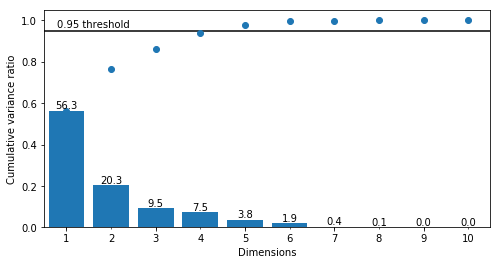

In [7]:
ppp.intr_dim(Berg_preprocessed_results[0]["TZ"], n_comp=10, cumul=True, bar=True)

___

## Post_processing

In [13]:
# Berg TZ
for i in range(1,10):
    ppp.post_processing("../_KRIGING/Kriged_pca_data_Berg_spherical/TZ/", 
                    Berg_preprocessed_results[0], 
                    Berg_preprocessed_results[1],
                    grid_data="ncols 100\n" +
                              "nrows 90\n" +
                              "xllcorner 5.6208707817415728\n" +
                              "yllcorner 50.959635321741573\n" +
                              "cellsize 0.00013419651685393446\n" +
                              "nodata_value 1.7014100000000001E+038\n",
                    n_components=i,
                    save_data=True);

Berg TZ
Upper_transformed_PC01.asc.xlsx (90, 100)
Upper_transformed_PC02.asc.xlsx (90, 100)
Upper_transformed_PC03.asc.xlsx (90, 100)
Upper_transformed_PC04.asc.xlsx (90, 100)
Upper_transformed_PC05.asc.xlsx (90, 100)
Upper_transformed_PC06.asc.xlsx (90, 100)
Upper_transformed_PC07.asc.xlsx (90, 100)
Upper_transformed_PC08.asc.xlsx (90, 100)
Upper_transformed_PC09.asc.xlsx (90, 100)
Number of grid points per file : 9000.0
Number of grid points in total: 81000


C:\Users\u0108248\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:13: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



gridpoints: 9000
Berg TZ
Upper_transformed_PC01.asc.xlsx (90, 100)
Upper_transformed_PC02.asc.xlsx (90, 100)
Upper_transformed_PC03.asc.xlsx (90, 100)
Upper_transformed_PC04.asc.xlsx (90, 100)
Upper_transformed_PC05.asc.xlsx (90, 100)
Upper_transformed_PC06.asc.xlsx (90, 100)
Upper_transformed_PC07.asc.xlsx (90, 100)
Upper_transformed_PC08.asc.xlsx (90, 100)
Upper_transformed_PC09.asc.xlsx (90, 100)
Number of grid points per file : 9000.0
Number of grid points in total: 81000
gridpoints: 9000
Berg TZ
Upper_transformed_PC01.asc.xlsx (90, 100)
Upper_transformed_PC02.asc.xlsx (90, 100)
Upper_transformed_PC03.asc.xlsx (90, 100)
Upper_transformed_PC04.asc.xlsx (90, 100)
Upper_transformed_PC05.asc.xlsx (90, 100)
Upper_transformed_PC06.asc.xlsx (90, 100)
Upper_transformed_PC07.asc.xlsx (90, 100)
Upper_transformed_PC08.asc.xlsx (90, 100)
Upper_transformed_PC09.asc.xlsx (90, 100)
Number of grid points per file : 9000.0
Number of grid points in total: 81000
gridpoints: 9000
Berg TZ
Upper_transfo

In [14]:
# Berg IZ
for i in range(1,10):
    ppp.post_processing("../_KRIGING/Kriged_pca_data_Berg_spherical/IZ/", 
                    Berg_preprocessed_results[0], 
                    Berg_preprocessed_results[1],
                    grid_data="ncols 100\n" +
                              "nrows 90\n" +
                              "xllcorner 5.6208707817415728\n" +
                              "yllcorner 50.959635321741573\n" +
                              "cellsize 0.00013419651685393446\n" +
                              "nodata_value 1.7014100000000001E+038\n",
                    n_components=i,
                    save_data=True);

Berg IZ
Middle_transformed_PC01.asc.xlsx (90, 100)
Middle_transformed_PC02.asc.xlsx (90, 100)
Middle_transformed_PC03.asc.xlsx (90, 100)
Middle_transformed_PC04.asc.xlsx (90, 100)
Middle_transformed_PC05.asc.xlsx (90, 100)
Middle_transformed_PC06.asc.xlsx (90, 100)
Middle_transformed_PC07.asc.xlsx (90, 100)
Middle_transformed_PC08.asc.xlsx (90, 100)
Middle_transformed_PC09.asc.xlsx (90, 100)
Number of grid points per file : 9000.0
Number of grid points in total: 81000


C:\Users\u0108248\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:13: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



gridpoints: 9000
Berg IZ
Middle_transformed_PC01.asc.xlsx (90, 100)
Middle_transformed_PC02.asc.xlsx (90, 100)
Middle_transformed_PC03.asc.xlsx (90, 100)
Middle_transformed_PC04.asc.xlsx (90, 100)
Middle_transformed_PC05.asc.xlsx (90, 100)
Middle_transformed_PC06.asc.xlsx (90, 100)
Middle_transformed_PC07.asc.xlsx (90, 100)
Middle_transformed_PC08.asc.xlsx (90, 100)
Middle_transformed_PC09.asc.xlsx (90, 100)
Number of grid points per file : 9000.0
Number of grid points in total: 81000
gridpoints: 9000
Berg IZ
Middle_transformed_PC01.asc.xlsx (90, 100)
Middle_transformed_PC02.asc.xlsx (90, 100)
Middle_transformed_PC03.asc.xlsx (90, 100)
Middle_transformed_PC04.asc.xlsx (90, 100)
Middle_transformed_PC05.asc.xlsx (90, 100)
Middle_transformed_PC06.asc.xlsx (90, 100)
Middle_transformed_PC07.asc.xlsx (90, 100)
Middle_transformed_PC08.asc.xlsx (90, 100)
Middle_transformed_PC09.asc.xlsx (90, 100)
Number of grid points per file : 9000.0
Number of grid points in total: 81000
gridpoints: 9000
Ber

In [9]:
# Berg GZ
for i in range(1,10):
    ppp.post_processing("../_KRIGING/Kriged_pca_data_Berg_spherical/GZ/", 
                    Berg_preprocessed_results[0], 
                    Berg_preprocessed_results[1],
                    grid_data="ncols 100\n" +
                              "nrows 90\n" +
                             "xllcorner  5.6208707817415728\n" +
                             "yllcorner 50.959635321741573\n" +
                             "cellsize 0.00013419651685393446\n" +
                             "nodata_value 1.7014100000000001E+038\n",
                    n_components=i,
                    save_data=True);

Berg GZ
Lower_transformed_PC01.asc.xlsx (90, 100)
Lower_transformed_PC02.asc.xlsx (90, 100)
Lower_transformed_PC03.asc.xlsx (90, 100)
Lower_transformed_PC04.asc.xlsx (90, 100)
Lower_transformed_PC05.asc.xlsx (90, 100)
Lower_transformed_PC06.asc.xlsx (90, 100)
Lower_transformed_PC07.asc.xlsx (90, 100)
Lower_transformed_PC08.asc.xlsx (90, 100)
Lower_transformed_PC09.asc.xlsx (90, 100)
Number of grid points per file : 9000.0
Number of grid points in total: 81000


C:\Users\u0108248\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:13: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



gridpoints: 9000
Berg GZ
Lower_transformed_PC01.asc.xlsx (90, 100)
Lower_transformed_PC02.asc.xlsx (90, 100)
Lower_transformed_PC03.asc.xlsx (90, 100)
Lower_transformed_PC04.asc.xlsx (90, 100)
Lower_transformed_PC05.asc.xlsx (90, 100)
Lower_transformed_PC06.asc.xlsx (90, 100)
Lower_transformed_PC07.asc.xlsx (90, 100)
Lower_transformed_PC08.asc.xlsx (90, 100)
Lower_transformed_PC09.asc.xlsx (90, 100)
Number of grid points per file : 9000.0
Number of grid points in total: 81000
gridpoints: 9000
Berg GZ
Lower_transformed_PC01.asc.xlsx (90, 100)
Lower_transformed_PC02.asc.xlsx (90, 100)
Lower_transformed_PC03.asc.xlsx (90, 100)
Lower_transformed_PC04.asc.xlsx (90, 100)
Lower_transformed_PC05.asc.xlsx (90, 100)
Lower_transformed_PC06.asc.xlsx (90, 100)
Lower_transformed_PC07.asc.xlsx (90, 100)
Lower_transformed_PC08.asc.xlsx (90, 100)
Lower_transformed_PC09.asc.xlsx (90, 100)
Number of grid points per file : 9000.0
Number of grid points in total: 81000
gridpoints: 9000
Berg GZ
Lower_transfo

In [15]:
# MHZ TZ
for i in range(1,10):
    ppp.post_processing("../_KRIGING/Kriged_pca_data_MHZ_spherical/TZ/", 
                    MHZ_preprocessed_results[0], 
                    MHZ_preprocessed_results[1],
                    grid_data="ncols 100\n" +
                              "nrows 81\n" +
                              "xllcorner 5.5967107548124995\n" +
                              "yllcorner 50.982328804812504\n" + 
                              "cellsize 0.00017565037499993607\n" +
                              "nodata_value 1.7014100000000001E+038\n",
                    n_components=i,
                    save_data=True);

MHZ TZ
Upper_transformed_MHZ_PC01.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC02.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC03.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC04.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC05.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC06.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC07.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC08.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC09.asc.xlsx (81, 100)
Number of grid points per file : 8100.0
Number of grid points in total: 72900


C:\Users\u0108248\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:13: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



gridpoints: 8100
MHZ TZ
Upper_transformed_MHZ_PC01.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC02.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC03.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC04.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC05.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC06.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC07.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC08.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC09.asc.xlsx (81, 100)
Number of grid points per file : 8100.0
Number of grid points in total: 72900
gridpoints: 8100
MHZ TZ
Upper_transformed_MHZ_PC01.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC02.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC03.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC04.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC05.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC06.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC07.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC08.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC09.asc.xlsx (81, 100)
Number of grid points per file : 8100.0
Number

In [16]:
# MHZ IZ
for i in range(1,10):
    ppp.post_processing("../_KRIGING/Kriged_pca_data_MHZ_spherical/IZ/", 
                    MHZ_preprocessed_results[0], 
                    MHZ_preprocessed_results[1],
                    grid_data="ncols 100\n" +
                              "nrows 81\n" +
                              "xllcorner 5.5967107548124995\n" +
                              "yllcorner 50.982328804812504\n" + 
                              "cellsize 0.00017565037499993607\n" +
                              "nodata_value 1.7014100000000001E+038\n",
                    n_components=i,
                    save_data=True);

MHZ IZ
Middle_transformed_MHZ_PC01.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC02.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC03.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC04.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC05.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC06.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC07.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC08.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC09.asc.xlsx (81, 100)
Number of grid points per file : 8100.0
Number of grid points in total: 72900


C:\Users\u0108248\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:13: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



gridpoints: 8100
MHZ IZ
Middle_transformed_MHZ_PC01.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC02.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC03.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC04.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC05.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC06.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC07.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC08.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC09.asc.xlsx (81, 100)
Number of grid points per file : 8100.0
Number of grid points in total: 72900
gridpoints: 8100
MHZ IZ
Middle_transformed_MHZ_PC01.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC02.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC03.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC04.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC05.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC06.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC07.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC08.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC09.asc.xlsx (81, 100)
Number of grid points per fi

In [17]:
# MHZ GZ
for i in range(1,10):
    ppp.post_processing("../_KRIGING/Kriged_pca_data_MHZ_spherical/GZ/", 
                    MHZ_preprocessed_results[0], 
                    MHZ_preprocessed_results[1],
                    grid_data="ncols 100\n" +
                              "nrows 74\n" +
                              "xllcorner 5.5967023332191781\n" +
                              "yllcorner 50.982320383219182\n" + 
                              "cellsize 0.00019249356164376555\n" +
                              "nodata_value 1.7014100000000001E+038\n",
                    n_components=i,
                    save_data=True);

MHZ GZ
Lower_transformed_MHZ_PC01.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC02.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC03.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC04.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC05.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC06.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC07.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC08.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC09.asc.xlsx (74, 100)
Number of grid points per file : 7400.0
Number of grid points in total: 66600


C:\Users\u0108248\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:13: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



gridpoints: 7400
MHZ GZ
Lower_transformed_MHZ_PC01.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC02.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC03.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC04.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC05.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC06.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC07.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC08.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC09.asc.xlsx (74, 100)
Number of grid points per file : 7400.0
Number of grid points in total: 66600
gridpoints: 7400
MHZ GZ
Lower_transformed_MHZ_PC01.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC02.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC03.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC04.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC05.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC06.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC07.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC08.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC09.asc.xlsx (74, 100)
Number of grid points per file : 7400.0
Number

___

## Cross validation

### Sample splitting (train/test 50/50)
- Use one grain size class as example
- For cross validation with 5 folds:
    - For each method (classic and new method):
        - For each quarry (Berg and MHZ):
            - For each geological layer (TZ, IZ and GZ)

Classic method:
- Only create grid file via Ordinary Kriging (OK) --> Grid file with GSD

New method:
- Pre-processing
- Create grid file via OK
- Post-processing --> Gridfile with GSD

### Value lookup
Lookup coordinates of requested test sample in kriged grid file:
- Starting coordinates (lowerleft corner) are known from the grid file
- Stepsize in x and y direction are also known from grid file (identital in both directions)

Requested coordinates = (starting_coordinate_X + n * stepsize_X, starting_coordinate_Y + n * stepsize_Y)

If requested coordinate falls exactly on a grid point in the grid file:  
- this value can be taken for validation.  

Else:  
- Calculate mean of 4 closest grid points and take this value for validation  

### Calculate MSE

- Create dataframe with requested looked up values of test samples
- Validate these values with the observed values from the database by calculating the Mean Squared Error (MSE); this is done for all 5 folds
- Average the MSE from these 5 folds and keep this value as a cross validation measure for the method in question

In [35]:
Berg_TZ = pd.read_excel("../_DATA/Berg_usable_data.xlsx").drop(["depth_from", "depth_to", "Top", "Bottom"], axis=1)
Berg_TZ = Berg_TZ.set_index("hole_id")
Berg_TZ.loc[["BRG_16_01"]]

,max_depth,lat,lon,elevation,year,code_geol,z_1000,z_710,z_500,z_355,z_250,z_180,z_125,z_90,z_63,z_0,TOTAL
hole_id,,,,,,,,,,,,,,,,,
BRG_16_01,50,50.96505,5.620938,89.67,2016,TZ,4.91,1.86,6.48,14.71,21.44,29.91,15.61,2.7,1.04,1.3,99.96


In [119]:
rootDir = "../_RESULTS/REVERSE_NEW/"
n_files = 0

results_quarry = {}
results_geol = {}

for dirName, subdirList, fileList in os.walk(rootDir):
    
    if dirName.endswith("Berg"):
        print(dirName)
        inputfile = "../_DATA/Berg_usable_data.xlsx"
        quarry = "Berg"
    elif dirName.endswith("MHZ"):
        print(dirName)
        inputfile = "../_DATA/MHZ_usable_data.xlsx"
        quarry = "MHZ"
        results_geol = {}
    else:
        pass
    
    if dirName.endswith("TZ"):
        code_geol = "TZ"
        print(code_geol)
    elif dirName.endswith("IZ"):
        code_geol = "IZ"
        print(code_geol)
    elif dirName.endswith("GZ"):
        code_geol="GZ"
        print(code_geol)
    else:
        pass
    
    boreholes = list(pd.read_excel(inputfile, sheet_name=code_geol).set_index("hole_id").index)
    
    results_temp = {}
    
    # Change code to incorporate all number of components
    # TO DO: Change to list [5comp, 9comp]
    if dirName.endswith("9comp"):
        for file in fileList:
            # TO DO: Change to list with all grain size classes
            if file.endswith("z_180_kriged_reverse_9comp_spherical.asc"):
                n_files +=1
                print(dirName + "\\" + file)
                gridfile = dirName + "\\" + file
                
                regex = "z_\d+"
                grain_size = re.search(regex, file).group()
                

                lookup_results = {}

                for borehole in boreholes:
                    lookup_results[borehole] = lookup_value(gridfile, inputfile, borehole, code_geol, average=False)
                lookup_df = pd.DataFrame.from_dict(lookup_results, orient='index')
                lookup_df.columns = ["Grid", "Actual"]
                lookup_df["Diff"] = lookup_df["Grid"] - lookup_df["Actual"]
                
                results_temp[grain_size] = lookup_df
        results_geol[code_geol] = results_temp     
    results_quarry[quarry] = results_geol
            
print(n_files)

../_RESULTS/REVERSE_NEW/Berg
GZ
../_RESULTS/REVERSE_NEW/Berg\GZ\9comp\Berg_GZ_z_180_kriged_reverse_9comp_spherical.asc
IZ
../_RESULTS/REVERSE_NEW/Berg\IZ\9comp\Berg_IZ_z_180_kriged_reverse_9comp_spherical.asc
TZ
../_RESULTS/REVERSE_NEW/Berg\TZ\9comp\Berg_TZ_z_180_kriged_reverse_9comp_spherical.asc
../_RESULTS/REVERSE_NEW/MHZ
GZ
../_RESULTS/REVERSE_NEW/MHZ\GZ\9comp\MHZ_GZ_z_180_kriged_reverse_9comp_spherical.asc
IZ
../_RESULTS/REVERSE_NEW/MHZ\IZ\9comp\MHZ_IZ_z_180_kriged_reverse_9comp_spherical.asc
TZ
../_RESULTS/REVERSE_NEW/MHZ\TZ\9comp\MHZ_TZ_z_180_kriged_reverse_9comp_spherical.asc
6


In [132]:
mse = {}
for quarry, value in results_quarry.items():
    mse_temp = {}
    for geol, value2 in value.items():
        for grain_size, data in value2.items():
            print(quarry)
            mse_result = ((data["Actual"] - data["Grid"]) ** 2).mean(axis=0)
            print(mse_result)
            mse_temp[geol] = mse_result
            print(mse_temp)
    mse[quarry] = mse_temp

MHZ
0.15159703715020917
{'GZ': 0.15159703715020917}
MHZ
0.09493668502274753
{'GZ': 0.15159703715020917, 'IZ': 0.09493668502274753}
MHZ
0.46024180299461265
{'GZ': 0.15159703715020917, 'IZ': 0.09493668502274753, 'TZ': 0.46024180299461265}
Berg
0.3187783395697824
{'GZ': 0.3187783395697824}
Berg
0.42965878759053566
{'GZ': 0.3187783395697824, 'IZ': 0.42965878759053566}
Berg
0.5004292491420992
{'GZ': 0.3187783395697824, 'IZ': 0.42965878759053566, 'TZ': 0.5004292491420992}


In [131]:
mse

{'Berg': {'GZ': 0.3187783395697824,
  'IZ': 0.42965878759053566,
  'TZ': 0.5004292491420992},
 'MHZ': {'GZ': 0.15159703715020917,
  'IZ': 0.09493668502274753,
  'TZ': 0.46024180299461265}}

In [84]:
results[("Berg", "GZ")]

{'z_180':                  Grid     Actual      Diff
 BRG_01_01   54.617768  54.850000 -0.232232
 BRG_01_02   62.527101  62.800000 -0.272899
 BRG_01_03   62.387551  62.650000 -0.262449
 BRG_01_04   60.708839  60.100000  0.608839
 BRG_01_05   48.981638  48.900000  0.081638
 BRG_01_06   54.108184  53.800000  0.308184
 BRG_01_07   52.005374  51.950000  0.055374
 BRG_01_08   43.796815  41.900000  1.896815
 BRG_01_09   59.458047  59.900000 -0.441953
 BRG_05_01   51.108464  51.054545  0.053919
 BRG_05_02   49.039530  48.900000  0.139530
 BRG_05_03   54.080253  53.737500  0.342753
 BRG_05_04   51.667308  51.377778  0.289530
 BRG_05_05   50.646607  50.564286  0.082321
 BRG_05_09   55.341392  54.554545  0.786847
 BRG_05_10   49.822646  49.258824  0.563823
 BRG_05_11   43.373468  42.619048  0.754421
 BRG_05_12   52.584818  52.568182  0.016637
 BRG_05_13   52.665218  52.520000  0.145218
 BRG_05_14   52.165113  51.992308  0.172805
 BRG_05_15   55.033763  54.920000  0.113763
 BRG_08_01   54.537801 

In [19]:
gridfile = "../_RESULTS/REVERSE_NEW/Berg/GZ/9comp/Berg_GZ_z_1000_kriged_reverse_9comp_test_spherical.asc"
inputfile = "../_DATA/Berg_usable_data.xlsx"
boreholes = list(pd.read_excel(inputfile, sheet_name="GZ").set_index("hole_id").index)

lookup_results = {}

for borehole in boreholes:
    lookup_results[borehole] = lookup_value(gridfile, inputfile, borehole, average=False)

In [20]:
lookup_df = pd.DataFrame.from_dict(lookup_results, orient='index')
lookup_df.columns = ["Grid", "Actual"]
lookup_df["Diff"] = lookup_df["Grid"] - lookup_df["Actual"]

In [21]:
lookup_df.style

,Grid,Actual,Diff
BRG_01_01,2.84218e-06,0,2.84218e-06
BRG_01_02,1.38237e-06,0,1.38237e-06
BRG_01_03,1.81618e-06,0,1.81618e-06
BRG_01_04,1.11785e-06,0,1.11785e-06
BRG_01_05,1.30844e-06,0,1.30844e-06
BRG_01_06,1.15424e-06,0,1.15424e-06
BRG_01_07,1.18728e-06,0,1.18728e-06
BRG_01_08,2.45659e-06,0,2.45659e-06
BRG_01_09,2.29705e-06,0,2.29705e-06
BRG_05_01,0.00927713,0.00909091,0.00018622


### Creating files for cross validation

In [168]:
rootDir = "../_DATA/"

quarry_dict = {}
for item in os.listdir(rootDir):
    quarry = item.split("_")[0]
    dataframe_dict = {}
    if item.endswith(".xlsx"):
        for sheet in ["TZ", "IZ", "GZ"]:
            dataframe_dict[sheet] = pd.read_excel(rootDir + item, sheet_name=sheet)
        quarry_dict[quarry] = dataframe_dict

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
# TO DO: add list of random states to pick from in order to 
# obtain reproducibilty of cross vaildation in the exact same way
# --> easy solution: use fold number [1, 2, 3, 4, 5] as random_state number

train_test_data = {}

for quarry, data in quarry_dict.items():
    for geol, item in data.items():
        for i in range(1, 6):
            train_test_data[quarry, geol, i] = train_test_split(item, test_size=0.2, random_state=i)

In [173]:
for key, split in train_test_data.items():
        Dirname = "../_CROSS_VALIDATION_80-20/" + key[0] + "/" + key[1] + "/"
        os.makedirs(os.path.dirname(Dirname), exist_ok=True)
        split[0].to_excel(Dirname + key[0] + "_" + key[1] + "_" + str(key[2]) + "_train.xlsx", sheet_name="train")
        split[1].to_excel(Dirname + key[0] + "_" + key[1] + "_" + str(key[2]) + "_test.xlsx", sheet_name="test")
        split[1].to_csv(Dirname + key[0] + "_" + key[1] + "_" + str(key[2]) + "_test.csv", sep=";")

### Cross validation pre-processing

**To Do:**
- Save pre-processing results so that they can be used in post-processing

In [174]:
# Cross validation pre-processing Berg
rootDir = "../_CROSS_VALIDATION_80-20/Berg/"

cross_validation_pre_processing_Berg = {}

for dirName, subdirList, fileList in os.walk(rootDir):
    
    if dirName.endswith("TZ"):
        code_geol = "TZ"
        print(code_geol)
    elif dirName.endswith("IZ"):
        code_geol = "IZ"
        print(code_geol)
    elif dirName.endswith("GZ"):
        code_geol="GZ"
        print(code_geol)
    else:
        code_geol = None
        
    i = 1
    
    layer_pre_processing = {}
    
    for file in fileList:
        if file.endswith("train.xlsx"):
            layer_pre_processing[f"train_{str(i)}"] = ppp.pre_processing(f"{rootDir}/{code_geol}/{file}", 
                                                           save_data=True, 
                                                           save_name=f"../_RESULTS/CROSS_VALIDATION_PREPROCESSED_80-20/Berg/{code_geol}/{code_geol}_{str(i)}_train_pca")
            i += 1
    if code_geol != None:
        cross_validation_pre_processing_Berg[code_geol] = layer_pre_processing

GZ
['train']
(28, 10)
4 PCA components with variance sum 0.9652199650130763 needed for obtaining sum of variance > 0.95
(28, 12)
['train']
(28, 10)
4 PCA components with variance sum 0.9753728023264707 needed for obtaining sum of variance > 0.95
(28, 12)
['train']
(28, 10)
5 PCA components with variance sum 0.99208945890492 needed for obtaining sum of variance > 0.95
(28, 12)
['train']
(28, 10)
4 PCA components with variance sum 0.9627033891249799 needed for obtaining sum of variance > 0.95
(28, 12)
['train']
(28, 10)
4 PCA components with variance sum 0.9530420361578971 needed for obtaining sum of variance > 0.95
(28, 12)
IZ
['train']
(31, 10)
4 PCA components with variance sum 0.958591567857292 needed for obtaining sum of variance > 0.95
(31, 12)
['train']
(31, 10)
5 PCA components with variance sum 0.9862637076542735 needed for obtaining sum of variance > 0.95
(31, 12)
['train']
(31, 10)
5 PCA components with variance sum 0.9847827338510212 needed for obtaining sum of variance > 0.9

In [175]:
# Cross validation pre-processing MHZ
rootDir = "../_CROSS_VALIDATION_80-20/MHZ/"

cross_validation_pre_processing_MHZ = {}

for dirName, subdirList, fileList in os.walk(rootDir):
    
    if dirName.endswith("TZ"):
        code_geol = "TZ"
        print(code_geol)
    elif dirName.endswith("IZ"):
        code_geol = "IZ"
        print(code_geol)
    elif dirName.endswith("GZ"):
        code_geol="GZ"
        print(code_geol)
    else:
        code_geol = None
        
    i = 1
    
    layer_pre_processing = {}
    
    for file in fileList:
        if file.endswith("train.xlsx"):
            layer_pre_processing[f"train_{str(i)}"] = ppp.pre_processing(f"{rootDir}/{code_geol}/{file}", 
                                                           save_data=True, 
                                                           save_name=f"../_RESULTS/CROSS_VALIDATION_PREPROCESSED_80-20/MHZ/{code_geol}/{code_geol}_{str(i)}_train_pca")
            i += 1
    if code_geol != None:
        cross_validation_pre_processing_MHZ[code_geol] = layer_pre_processing

GZ
['train']
(46, 10)
4 PCA components with variance sum 0.954682252545825 needed for obtaining sum of variance > 0.95
(46, 12)
['train']
(46, 10)
4 PCA components with variance sum 0.9570777225479872 needed for obtaining sum of variance > 0.95
(46, 12)
['train']
(46, 10)
4 PCA components with variance sum 0.953931154609583 needed for obtaining sum of variance > 0.95
(46, 12)
['train']
(46, 10)
4 PCA components with variance sum 0.957634886917263 needed for obtaining sum of variance > 0.95
(46, 12)
['train']
(46, 10)
4 PCA components with variance sum 0.9629929754728845 needed for obtaining sum of variance > 0.95
(46, 12)
IZ
['train']
(48, 10)
4 PCA components with variance sum 0.9869048965166906 needed for obtaining sum of variance > 0.95
(48, 12)
['train']
(48, 10)
3 PCA components with variance sum 0.9686151766041879 needed for obtaining sum of variance > 0.95
(48, 12)
['train']
(48, 10)
3 PCA components with variance sum 0.9670195078836951 needed for obtaining sum of variance > 0.9

### Cross validation post-processing

In [9]:
cross_validation_pre_processing_Berg["GZ"]["train_1"][1]

{'train': PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False)}

In [22]:
# Dictionary with grid info data

dict_grid_info = {"Berg":     "ncols 100\n" +
                              "nrows 90\n" +
                              "xllcorner 5.6208707817415728\n" +
                              "yllcorner 50.959635321741573\n" +
                              "cellsize 0.00013419651685393446\n" +
                              "nodata_value 1.7014100000000001E+038\n",
                  
                 "MHZ_GZ":    "ncols 100\n" +
                              "nrows 74\n" +
                              "xllcorner 5.5967023332191781\n" +
                              "yllcorner 50.982320383219182\n" + 
                              "cellsize 0.00019249356164376555\n" +
                              "nodata_value 1.7014100000000001E+038\n",
                  
                 "MHZ_IZ_TZ": "ncols 100\n" +
                              "nrows 81\n" +
                              "xllcorner 5.5967107548124995\n" +
                              "yllcorner 50.982328804812504\n" + 
                              "cellsize 0.00017565037499993607\n" +
                              "nodata_value 1.7014100000000001E+038\n",}

In [185]:
%%time
# Post_processing cross-validation: CHANGE PARAMETERS IN FUNCTION FOR DIFFERENT QUARRIES/LAYERS!
for j in range(1,6):
    for i in range(1,10):
        ppp.post_processing(f"../_KRIGING/CROSS_VALIDATION_PREPROCESSED_80-20/data_MHZ/TZ/train_{str(j)}/", 
                        cross_validation_pre_processing_MHZ["TZ"][f"train_{str(j)}"][0], 
                        cross_validation_pre_processing_MHZ["TZ"][f"train_{str(j)}"][1],
                        grid_data=dict_grid_info["MHZ_IZ_TZ"],
                        n_components=i,
                        save_data=True);
    
# TO DO: create folder structure to save files in and change code in post-processing script

MHZ TZ
TZ_1_train_pca_PC01.asc.xlsx (81, 100)
TZ_1_train_pca_PC02.asc.xlsx (81, 100)
TZ_1_train_pca_PC03.asc.xlsx (81, 100)
TZ_1_train_pca_PC04.asc.xlsx (81, 100)
TZ_1_train_pca_PC05.asc.xlsx (81, 100)
TZ_1_train_pca_PC06.asc.xlsx (81, 100)
TZ_1_train_pca_PC07.asc.xlsx (81, 100)
TZ_1_train_pca_PC08.asc.xlsx (81, 100)
TZ_1_train_pca_PC09.asc.xlsx (81, 100)
Number of grid points per file : 8100.0
Number of grid points in total: 72900


C:\Users\Bram\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



gridpoints: 8100
MHZ TZ
TZ_1_train_pca_PC01.asc.xlsx (81, 100)
TZ_1_train_pca_PC02.asc.xlsx (81, 100)
TZ_1_train_pca_PC03.asc.xlsx (81, 100)
TZ_1_train_pca_PC04.asc.xlsx (81, 100)
TZ_1_train_pca_PC05.asc.xlsx (81, 100)
TZ_1_train_pca_PC06.asc.xlsx (81, 100)
TZ_1_train_pca_PC07.asc.xlsx (81, 100)
TZ_1_train_pca_PC08.asc.xlsx (81, 100)
TZ_1_train_pca_PC09.asc.xlsx (81, 100)
Number of grid points per file : 8100.0
Number of grid points in total: 72900
gridpoints: 8100
MHZ TZ
TZ_1_train_pca_PC01.asc.xlsx (81, 100)
TZ_1_train_pca_PC02.asc.xlsx (81, 100)
TZ_1_train_pca_PC03.asc.xlsx (81, 100)
TZ_1_train_pca_PC04.asc.xlsx (81, 100)
TZ_1_train_pca_PC05.asc.xlsx (81, 100)
TZ_1_train_pca_PC06.asc.xlsx (81, 100)
TZ_1_train_pca_PC07.asc.xlsx (81, 100)
TZ_1_train_pca_PC08.asc.xlsx (81, 100)
TZ_1_train_pca_PC09.asc.xlsx (81, 100)
Number of grid points per file : 8100.0
Number of grid points in total: 72900
gridpoints: 8100
MHZ TZ
TZ_1_train_pca_PC01.asc.xlsx (81, 100)
TZ_1_train_pca_PC02.asc.xlsx (8

In [23]:
for i,j in zip(range(5), range(10)):
    print(i,j)

0 0
1 1
2 2
3 3
4 4


In [26]:
for dirName, subdirList, fileList, dirName2, subdirList2, fileList2 in zip(os.walk(rootDir), os.walk(rootDir2))
    print

../_RESULTS/CROSS_VALIDATION_POSTPROCESSED/ ../_CROSS_VALIDATION/
../_RESULTS/CROSS_VALIDATION_POSTPROCESSED/Berg ../_CROSS_VALIDATION/Berg
../_RESULTS/CROSS_VALIDATION_POSTPROCESSED/Berg\GZ ../_CROSS_VALIDATION/Berg\GZ
../_RESULTS/CROSS_VALIDATION_POSTPROCESSED/Berg\GZ\1comp ../_CROSS_VALIDATION/Berg\IZ
../_RESULTS/CROSS_VALIDATION_POSTPROCESSED/Berg\GZ\1comp\1 ../_CROSS_VALIDATION/Berg\TZ
../_RESULTS/CROSS_VALIDATION_POSTPROCESSED/Berg\GZ\1comp\2 ../_CROSS_VALIDATION/MHZ
../_RESULTS/CROSS_VALIDATION_POSTPROCESSED/Berg\GZ\1comp\3 ../_CROSS_VALIDATION/MHZ\GZ
../_RESULTS/CROSS_VALIDATION_POSTPROCESSED/Berg\GZ\1comp\4 ../_CROSS_VALIDATION/MHZ\IZ
../_RESULTS/CROSS_VALIDATION_POSTPROCESSED/Berg\GZ\1comp\5 ../_CROSS_VALIDATION/MHZ\TZ


In [89]:
rootDir = "../_CROSS_VALIDATION/"

n_files = 0

for dirName, subdirList, fileList in os.walk(rootDir):
    for file in fileList:
        if file.endswith("test.xlsx"):
            temp = pd.read_excel(dirName+"/"+file)
            temp.to_csv(dirName+"/"+file[:-5]+".csv", sep=";")

In [128]:
#Debug: profile function to see where performance can be improved
%lprun -f cv.lookup_value cv.lookup_value("../_RESULTS/CROSS_VALIDATION_POSTPROCESSED/Berg/GZ/1comp/1/Berg_GZ_z_0_kriged_reverse_1comp_spherical_1.asc", inputfile, borehole, average=False)

Timer unit: 3.00469e-07 s

Total time: 0.00996446 s
File: D:\Onedrive\Documenten\Programming\Python\Jupyter_Notebooks\PROJECTS\Compositional_data_kriging\_ANALYSIS\compositional_data_kriging\cross_validation.py
Function: lookup_value at line 14

Line #      Hits         Time  Per Hit   % Time  Line Contents
    14                                           def lookup_value(grid_file, input_file, sample, code_geol=None, average=True):
    15                                               """Lookup value of borehole value in grid file based 
    16                                               on coordinates of requested borehole sample in input file"""
    17                                               # Open file
    18         1        496.0    496.0      1.5      f = open(grid_file)
    19         1       2462.0   2462.0      7.4      grid = f.readlines()
    20                                               
    21                                               # Allocate grid info (S

In [105]:
#Debug
pd.read_csv(inputfile, sep=";", index_col="hole_id")

,Unnamed: 0,max_depth,lat,lon,elevation,year,depth_from,depth_to,code_geol,Top,...,z_710,z_500,z_355,z_250,z_180,z_125,z_90,z_63,z_0,TOTAL
hole_id,,,,,,,,,,,,,,,,,,,,,
BRG_01_09,8,27,50.965137,5.630287,72.16,2001,26.16,27,GZ,46.00,...,0.000000,0.000000,0.200000,21.500000,59.900000,17.900000,0.400000,0.000000,0.000000,99.900000
BRG_05_09,14,62,50.968120,5.627148,92.01,2005,39.01,62,GZ,53.00,...,0.027273,0.095455,2.045455,31.104545,54.554545,11.345455,0.631818,0.050000,0.013636,99.936364
BRG_13_02,23,28,50.966146,5.631863,65.01,2013,20.01,28,GZ,45.00,...,0.037500,0.062500,0.900000,16.387500,48.800000,30.675000,2.387500,0.212500,0.025000,99.962500
BRG_05_01,9,36,50.965625,5.626444,72.94,2005,25.50,36,GZ,47.44,...,0.027273,0.136364,1.727273,33.327273,51.054545,12.554545,0.936364,0.100000,0.045455,99.918182
BRG_05_12,17,48,50.969479,5.629521,76.35,2005,26.58,48,GZ,49.77,...,0.009091,0.118182,2.609091,33.350000,52.568182,10.740909,0.450000,0.027273,0.000000,99.945455
BRG_05_11,16,62,50.970905,5.626880,91.99,2005,41.99,62,GZ,50.00,...,0.061905,0.371429,6.580952,39.895238,42.619048,8.671429,0.695238,0.042857,0.038095,99.923810
BRG_01_05,4,30,50.965749,5.628222,75.31,2001,25.31,30,GZ,50.00,...,0.000000,0.000000,0.850000,47.050000,48.900000,3.050000,0.100000,0.000000,0.000000,99.950000
BRG_01_01,0,30,50.968792,5.629597,72.51,2001,23.21,30,GZ,49.30,...,0.000000,0.100000,2.300000,34.000000,54.850000,8.400000,0.250000,0.000000,0.000000,99.900000
BRG_16_03,26,50,50.967294,5.622091,91.52,2016,40.52,50,GZ,51.00,...,0.050000,0.350000,5.280000,33.120000,45.090000,14.530000,0.970000,0.210000,0.200000,100.010000


In [154]:
#Debug
test_path = "../_RESULTS/CROSS_VALIDATION_POSTPROCESSED/Berg/GZ/1comp/1"

regex2 = "/\d"
n_train = re.search(regex2, test_path).group()
n_train = n_train[1]

In [155]:
#Debug
n_train

'1'

In [420]:
%%time

results_quarry = {}

for quarry in ["Berg", "MHZ"]:
    print(quarry)
    results_geol = {}
    
    for code_geol in ["GZ", "IZ", "TZ"]:
        print("\t", code_geol)
        results_n_comp = {}

        for i in range(1,10):
            print(f"\t\t{i}comp")
            results_n_comp[f"{i}comp"] = cross_validation(f"../_RESULTS/CROSS_VALIDATION_POSTPROCESSED/{quarry}/{code_geol}/{str(i)}comp")
            
        results_geol[code_geol] = results_n_comp
        
    results_quarry[quarry] = results_geol

Berg
	 GZ
		1comp
GZ
GZ
Berg_GZ_z_0_kriged_reverse_1comp_spherical_1.asc ../_CROSS_VALIDATION/Berg/GZ/Berg_GZ_1_test.csv
Berg_GZ_z_1000_kriged_reverse_1comp_spherical_1.asc ../_CROSS_VALIDATION/Berg/GZ/Berg_GZ_1_test.csv
Berg_GZ_z_125_kriged_reverse_1comp_spherical_1.asc ../_CROSS_VALIDATION/Berg/GZ/Berg_GZ_1_test.csv
Berg_GZ_z_180_kriged_reverse_1comp_spherical_1.asc ../_CROSS_VALIDATION/Berg/GZ/Berg_GZ_1_test.csv
Berg_GZ_z_250_kriged_reverse_1comp_spherical_1.asc ../_CROSS_VALIDATION/Berg/GZ/Berg_GZ_1_test.csv
Berg_GZ_z_355_kriged_reverse_1comp_spherical_1.asc ../_CROSS_VALIDATION/Berg/GZ/Berg_GZ_1_test.csv
Berg_GZ_z_500_kriged_reverse_1comp_spherical_1.asc ../_CROSS_VALIDATION/Berg/GZ/Berg_GZ_1_test.csv
Berg_GZ_z_63_kriged_reverse_1comp_spherical_1.asc ../_CROSS_VALIDATION/Berg/GZ/Berg_GZ_1_test.csv
Berg_GZ_z_710_kriged_reverse_1comp_spherical_1.asc ../_CROSS_VALIDATION/Berg/GZ/Berg_GZ_1_test.csv
Berg_GZ_z_90_kriged_reverse_1comp_spherical_1.asc ../_CROSS_VALIDATION/Berg/GZ/Berg_GZ_

In [429]:
results_quarry["MHZ"]["IZ"]["8comp"]["3"]

{'z_0':                Grid    Actual      Diff
 LBU_05_27  0.017594  0.000000  0.017594
 LBU_96_4   0.000002  0.000000  0.000002
 LBU_96_2   0.003182  0.000000  0.003182
 LBU_05_15  0.000554  0.000000  0.000554
 LBU_05_29  0.004360  0.022240 -0.017880
 LBU_05_16  0.005400  0.000000  0.005400
 LBU_05_17  0.004340  0.006254 -0.001914
 LBU_01_1   0.000009  0.175044 -0.175034
 LBU_05_09  0.002650  0.015801 -0.013151
 LBU_05_05  0.000639  0.000000  0.000639
 LBU_05_23  0.028094  0.000000  0.028094
 LBU_05_10  0.000137  0.010011 -0.009874
 LBU_05_02  0.000717  0.010532 -0.009815
 LBU_05_12  0.000136  0.011114 -0.010978
 LBU_05_24  0.046240  0.000000  0.046240
 LBU_05_20  0.014973  0.000000  0.014973
 LBU_07_02  0.015946  0.009096  0.006850
 LBU_05_13  0.000264  0.000000  0.000264
 LBU_96_3   0.013630  0.000000  0.013630
 LBU_07_01  0.003594  0.000000  0.003594
 LBU_05_26  0.001962  0.000000  0.001962
 LBU_02_3   0.003276  0.050025 -0.046749
 LBU_05_21  0.000713  0.000000  0.000713
 LBU_98_7

In [29]:
# Module to save Python instances (e.g. dictionary)
# as a binary file to disk which later can be loaded
import pickle

def save_obj(obj, name):
    with open("../_DATA/obj/" + name + ".pkl", 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open("../_DATA/obj/" + name + ".pkl", 'rb') as f:
        return pickle.load(f)

In [421]:
save_obj(results_quarry, "cross_validation_results")

In [406]:
#Debug
tester = {}

for i in range(1,10):
    tester[f"{i}comp"] = cross_validation(f"../_RESULTS/CROSS_VALIDATION_POSTPROCESSED/Berg/GZ/{str(i)}comp/")

GZ
GZ
Berg_GZ_z_0_kriged_reverse_1comp_spherical_1.asc ../_CROSS_VALIDATION/Berg/GZ/Berg_GZ_1_test.csv
Berg_GZ_z_1000_kriged_reverse_1comp_spherical_1.asc ../_CROSS_VALIDATION/Berg/GZ/Berg_GZ_1_test.csv
Berg_GZ_z_125_kriged_reverse_1comp_spherical_1.asc ../_CROSS_VALIDATION/Berg/GZ/Berg_GZ_1_test.csv
Berg_GZ_z_180_kriged_reverse_1comp_spherical_1.asc ../_CROSS_VALIDATION/Berg/GZ/Berg_GZ_1_test.csv
Berg_GZ_z_250_kriged_reverse_1comp_spherical_1.asc ../_CROSS_VALIDATION/Berg/GZ/Berg_GZ_1_test.csv
Berg_GZ_z_355_kriged_reverse_1comp_spherical_1.asc ../_CROSS_VALIDATION/Berg/GZ/Berg_GZ_1_test.csv
Berg_GZ_z_500_kriged_reverse_1comp_spherical_1.asc ../_CROSS_VALIDATION/Berg/GZ/Berg_GZ_1_test.csv
Berg_GZ_z_63_kriged_reverse_1comp_spherical_1.asc ../_CROSS_VALIDATION/Berg/GZ/Berg_GZ_1_test.csv
Berg_GZ_z_710_kriged_reverse_1comp_spherical_1.asc ../_CROSS_VALIDATION/Berg/GZ/Berg_GZ_1_test.csv
Berg_GZ_z_90_kriged_reverse_1comp_spherical_1.asc ../_CROSS_VALIDATION/Berg/GZ/Berg_GZ_1_test.csv
GZ
Berg

In [411]:
#Debug
tester["9comp"]["3"]

{'z_0':                    Grid    Actual          Diff
 BRG_16_01  6.113664e-03  0.240000 -2.338863e-01
 BRG_05_14  5.328352e-03  0.046154 -4.082549e-02
 BRG_01_01  1.604658e-03  0.000000  1.604658e-03
 BRG_01_09  8.597485e-07  0.000000  8.597485e-07
 BRG_01_06  4.742441e-06  0.000000  4.742441e-06
 BRG_05_10  2.254076e-05  0.011765 -1.174217e-02
 BRG_05_09  2.516828e-05  0.013636 -1.361120e-02
 BRG_05_12  1.604658e-03  0.000000  1.604658e-03
 BRG_01_02  1.535490e-03  0.000000  1.535490e-03
 BRG_16_05  6.016768e-03  0.133333 -1.273166e-01
 BRG_01_05  1.193513e-04  0.000000  1.193513e-04
 BRG_13_01  4.935859e-03  0.012500 -7.564141e-03
 BRG_05_11  1.834554e-05  0.038095 -3.807689e-02
 BRG_01_03  9.423319e-04  0.000000  9.423319e-04
 BRG_16_09  1.990293e-04  0.200000 -1.998010e-01
 BRG_13_02  2.748927e-04  0.025000 -2.472511e-02
 BRG_01_04  9.595593e-05  0.000000  9.595593e-05
 ECO_09_02  2.315702e-03  0.100000 -9.768430e-02,
 'z_1000':                Grid    Actual      Diff
 BRG_16_01

In [385]:
results_grain_size

{'z_0':                Grid    Actual      Diff
 LBU_01_1   0.049304  0.566761 -0.517457
 LBU_05_29  0.075023  0.112570 -0.037548
 LBU_05_21  0.046619  0.025038  0.021581
 LBU_05_17  0.033837  0.030793  0.003045
 LBU_05_04  0.051517  0.100046 -0.048529
 LBU_05_22  0.052096  0.028592  0.023504
 LBU_05_25  0.114476  0.050019  0.064457
 LBU_05_07  0.063116  0.025027  0.038089
 MHZ_08_04  0.048320  0.775388 -0.727068
 LBU_05_14  0.042059  0.030012  0.012047
 LBU_07_01  0.057583  0.057208  0.000375
 LBU_05_18  0.045171  0.023086  0.022085
 LBU_05_12  0.044990  0.044494  0.000496
 LBU_05_13  0.044371  0.116696 -0.072325
 LBU_05_28  0.152602  0.055593  0.097010
 LBU_05_02  0.072291  0.281356 -0.209064
 MHZ_12_02  0.070788  0.562922 -0.492134
 MHZ_08_01  0.046804  0.128663 -0.081859
 LBU_07_03  0.051290  0.200200 -0.148910
 LBU_05_26  0.067090  0.025006  0.042084
 LBU_05_01  0.064314  0.264908 -0.200594
 MHZ_12_01  0.079613  0.758713 -0.679100
 MHZ_08_02  0.053723  0.100100 -0.046377
 LBU_02_3

In [253]:
results_grain_size

{'z_0':                Grid    Actual      Diff
 LBU_01_1   0.049304  0.566761 -0.517457
 LBU_05_29  0.075023  0.112570 -0.037548
 LBU_05_21  0.046619  0.025038  0.021581
 LBU_05_17  0.033837  0.030793  0.003045
 LBU_05_04  0.051517  0.100046 -0.048529
 LBU_05_22  0.052096  0.028592  0.023504
 LBU_05_25  0.114476  0.050019  0.064457
 LBU_05_07  0.063116  0.025027  0.038089
 MHZ_08_04  0.048320  0.775388 -0.727068
 LBU_05_14  0.042059  0.030012  0.012047
 LBU_07_01  0.057583  0.057208  0.000375
 LBU_05_18  0.045171  0.023086  0.022085
 LBU_05_12  0.044990  0.044494  0.000496
 LBU_05_13  0.044371  0.116696 -0.072325
 LBU_05_28  0.152602  0.055593  0.097010
 LBU_05_02  0.072291  0.281356 -0.209064
 MHZ_12_02  0.070788  0.562922 -0.492134
 MHZ_08_01  0.046804  0.128663 -0.081859
 LBU_07_03  0.051290  0.200200 -0.148910
 LBU_05_26  0.067090  0.025006  0.042084
 LBU_05_01  0.064314  0.264908 -0.200594
 MHZ_12_01  0.079613  0.758713 -0.679100
 MHZ_08_02  0.053723  0.100100 -0.046377
 LBU_02_3

In [339]:
#Debug
results_quarry["Berg"]["IZ"]["9comp"]["3"]["z_0"]

,Grid,Actual,Diff
BRG_05_05,0.002644,0.005000,-0.002356
BRG_01_01,0.000006,0.000000,0.000006
BRG_16_02,0.009466,0.725000,-0.715534
BRG_16_05,0.004310,1.369231,-1.364921
ECO_09_05,0.002644,0.038095,-0.035451
ECO_09_03,0.002932,0.270000,-0.267068
BRG_01_09,0.000043,0.000000,0.000043
BRG_05_02,0.001737,0.000000,0.001737
ECO_09_01,0.002644,0.450000,-0.447356
BRG_16_03,0.003483,3.346667,-3.343183


In [37]:
def calculate_mse(CV_results):
    """Calculate Mean Squared Error based on 
    cross validation (CV) results"""

    mse_quarry = {}

    for quarry, geol_data in results_quarry.items():
        mse_geol = {}

        for geol, comp_data in geol_data.items():
            mse_comp = {}

            for comp, train_data in comp_data.items():
                mse_train = {}

                for train, grain_size_data in train_data.items():
                    mse_grain_size = {}

                    for grain_size, data in grain_size_data.items():
                        # MSE calculation
                        mse_result = ((data["Actual"] - data["Grid"]) ** 2).mean(axis=0)
                        mse_grain_size[grain_size] = mse_result

                    mse_train[train] = mse_grain_size

                mse_comp[comp] = mse_train

            mse_geol[geol] = mse_comp

        mse_quarry[quarry] = mse_geol
        
    return mse_quarry

In [447]:
mse_results = calculate_mse_classic(results_quarry)

In [452]:
#Debug
mse_results["Berg"]["GZ"]["5comp"]

{'1': {'z_0': 0.04540981246738452,
  'z_1000': 0.09357665237380138,
  'z_125': 73.1608941358424,
  'z_180': 35.16255780438642,
  'z_250': 112.60322979809092,
  'z_355': 2.244230159493182,
  'z_500': 0.02447992614592592,
  'z_63': 0.015074226405686767,
  'z_710': 0.0028296781181710497,
  'z_90': 0.5910960549903632},
 '2': {'z_0': 0.03161678573736279,
  'z_1000': 0.056904571956822685,
  'z_125': 74.18153532655252,
  'z_180': 62.273771459495784,
  'z_250': 155.0805539893755,
  'z_355': 1.656579979430933,
  'z_500': 0.03932231639971116,
  'z_63': 0.008472198244100762,
  'z_710': 0.010778837818245169,
  'z_90': 0.4037111339889829},
 '3': {'z_0': 0.006922379962932507,
  'z_1000': 0.11170300542852403,
  'z_125': 71.92859728035288,
  'z_180': 64.37666250818002,
  'z_250': 99.2483711438299,
  'z_355': 1.9066982775190193,
  'z_500': 0.048816939095141114,
  'z_63': 0.015819770724121066,
  'z_710': 0.0115014752528021,
  'z_90': 0.5844981477924203},
 '4': {'z_0': 0.03566656343832903,
  'z_1000': 0.

In [432]:
np.mean(list(mse_quarry["Berg"]["GZ"]["9comp"]["1"].values()))

22.3266394227836

In [433]:
#Debug
averaged_mse_n_comp = {}

for n_comp in ["5comp", "9comp"]:
    print(n_comp)
    averaged_mse_n_comp[n_comp] = average_mse_results_CVfolds(mse_results, quarry, geol, n_comp)

5comp
9comp


In [434]:
averaged_mse_n_comp

{'5comp': {'1': 22.121787650721402,
  '2': 22.027222662306084,
  '3': 22.0806591899781,
  '4': 22.712611453688766,
  '5': 21.450808177814697},
 '9comp': {'1': 22.121787650721402,
  '2': 22.027222662306084,
  '3': 22.0806591899781,
  '4': 22.712611453688766,
  '5': 21.450808177814697}}

In [453]:
averaged_mse_quarry = {}

for quarry in ["Berg", "MHZ"]:
    averaged_mse_geol = {}
    
    for geol in ["GZ", "IZ", "TZ"]:
        averaged_mse_n_comp = {}
        
        for n_comp in ["5comp", "9comp"]:
            averaged_mse_n_comp[n_comp] = average_mse_results_CVfolds(mse_results, quarry, geol, n_comp)
            
        averaged_mse_geol[geol] = averaged_mse_n_comp
        
    averaged_mse_quarry[quarry] = averaged_mse_geol

In [454]:
averaged_mse_quarry

{'Berg': {'GZ': {'5comp': {'1': 22.394337824831425,
    '2': 29.374324659899997,
    '3': 23.823959092813777,
    '4': 21.236193589379173,
    '5': 30.732354149803719},
   '9comp': {'1': 22.3266394227836,
    '2': 28.160921762343225,
    '3': 27.69344510547187,
    '4': 21.558781014729885,
    '5': 31.391709271405205}},
  'IZ': {'5comp': {'1': 25.219487665826012,
    '2': 36.834364437276982,
    '3': 23.119724460967369,
    '4': 12.691013335926556,
    '5': 20.97708726372273},
   '9comp': {'1': 26.886570685404319,
    '2': 37.661929654421129,
    '3': 22.974985661199604,
    '4': 13.848902341140743,
    '5': 20.792326591242041}},
  'TZ': {'5comp': {'1': 16.652847849484019,
    '2': 18.388858847443181,
    '3': 15.976750958575517,
    '4': 17.531642559770606,
    '5': 18.485120100037147},
   '9comp': {'1': 16.033108499998811,
    '2': 16.090199200233943,
    '3': 15.342481705782266,
    '4': 18.25759146544754,
    '5': 16.965278958928838}}},
 'MHZ': {'GZ': {'5comp': {'1': 19.73704729283

In [38]:
def average_mse_results_CVfolds(mse_results, quarry, code_geol, n_comp):

    averaged_mse_results = {}

    for train, grain_size_data in mse_results[quarry][code_geol][n_comp].items():
        values = []
        for grain_size, data in grain_size_data.items():
            values.append(data)
        averaged_mse_results[train] = np.mean(values)
    return(averaged_mse_results)

In [462]:
averaged_mse_quarry

{'Berg': {'GZ': {'5comp': {'1': 22.394337824831425,
    '2': 29.374324659899997,
    '3': 23.823959092813777,
    '4': 21.236193589379173,
    '5': 30.732354149803719},
   '9comp': {'1': 22.3266394227836,
    '2': 28.160921762343225,
    '3': 27.69344510547187,
    '4': 21.558781014729885,
    '5': 31.391709271405205}},
  'IZ': {'5comp': {'1': 25.219487665826012,
    '2': 36.834364437276982,
    '3': 23.119724460967369,
    '4': 12.691013335926556,
    '5': 20.97708726372273},
   '9comp': {'1': 26.886570685404319,
    '2': 37.661929654421129,
    '3': 22.974985661199604,
    '4': 13.848902341140743,
    '5': 20.792326591242041}},
  'TZ': {'5comp': {'1': 16.652847849484019,
    '2': 18.388858847443181,
    '3': 15.976750958575517,
    '4': 17.531642559770606,
    '5': 18.485120100037147},
   '9comp': {'1': 16.033108499998811,
    '2': 16.090199200233943,
    '3': 15.342481705782266,
    '4': 18.25759146544754,
    '5': 16.965278958928838}}},
 'MHZ': {'GZ': {'5comp': {'1': 19.73704729283

In [469]:
averaged_mse_quarry_n_comp = {}

for quarry, geol_data in averaged_mse_quarry.items():
    for geol, n_comp_data in geol_data.items():
        for n_comp, data in n_comp_data.items():
            averaged_mse_quarry_n_comp[quarry, geol, n_comp] = average_mse_results_n_comp(data)

In [472]:
averaged_mse_quarry_n_comp

{('Berg', 'GZ', '5comp'): 25.512233863345621,
 ('Berg', 'GZ', '9comp'): 26.226299315346758,
 ('Berg', 'IZ', '5comp'): 23.768335432743932,
 ('Berg', 'IZ', '9comp'): 24.432942986681567,
 ('Berg', 'TZ', '5comp'): 17.407044063062095,
 ('Berg', 'TZ', '9comp'): 16.537731966078276,
 ('MHZ', 'GZ', '5comp'): 24.735930814450256,
 ('MHZ', 'GZ', '9comp'): 25.39814627041957,
 ('MHZ', 'IZ', '5comp'): 9.9735031839029205,
 ('MHZ', 'IZ', '9comp'): 9.7501018871834102,
 ('MHZ', 'TZ', '5comp'): 22.353884874864214,
 ('MHZ', 'TZ', '9comp'): 22.078617826901812}

In [474]:
save_obj(averaged_mse_quarry_n_comp, "MSE_new_approach")

In [456]:
#Debug
Berg_GZ_9comp_train = average_mse_results(mse_results, "Berg", "GZ", "9comp")

In [457]:
#Debug
Berg_GZ_9comp_train

{'1': 22.3266394227836,
 '2': 28.160921762343225,
 '3': 27.69344510547187,
 '4': 21.558781014729885,
 '5': 31.391709271405205}

In [39]:
def average_mse_results_n_comp(averaged_mse_results):
    
    values = []

    for key, value in averaged_mse_results.items():
        values.append(value)
        
    return(np.mean(values))

In [459]:
Berg_GZ_9comp = average_mse_results_n_comp(Berg_GZ_9comp_train)

In [460]:
Berg_GZ_9comp

26.226299315346758

### Cross validation MSE calculation

In [114]:
%%time
# Classic approach
rootDir_grid = "../_KRIGING/CROSS_VALIDATION_CLASSIC//"
rootDir_input = "../_CROSS_VALIDATION/"
n_files = 0

results_quarry = {}
results_geol = {}

for dirName, subdirList, fileList in os.walk(rootDir):
    print(dirName)
    if dirName.endswith("Berg"):
        print(dirName)
        quarry = "Berg"
    elif dirName.endswith("MHZ"):
        print(dirName)
        quarry = "MHZ"
        results_geol = {}
    else:
        quarry = None
    
    if dirName.endswith("TZ"):
        code_geol = "TZ"
        print(code_geol)
    elif dirName.endswith("IZ"):
        code_geol = "IZ"
        print(code_geol)
    elif dirName.endswith("GZ"):
        code_geol="GZ"
        print(code_geol)
    else:
        pass

    
    results_temp = {}
    for file in fileList:
        print(file)
        if file[-6] in [1, 2, 3, 4, 5]:
            print(file[-6])
            n_train = file[-6]
            
            inputfile = f"../_CROSS_VALIDATION/{quarry}/{code_geol}/{quarry}_{code_geol}_{n_train}_test"
            boreholes = list(pd.read_excel(inputfile, sheet_name=code_geol).set_index("hole_id").index)


            n_files +=1
            print(dirName + "\\" + file)
            gridfile = dirName + "\\" + file

            regex = "z_\d+"
            grain_size = re.search(regex, file).group()

            lookup_results = {}

            for borehole in boreholes:
                lookup_results[borehole] = lookup_value(gridfile, inputfile, borehole, code_geol, average=False)
            lookup_df = pd.DataFrame.from_dict(lookup_results, orient='index')
            lookup_df.columns = ["Grid", "Actual"]
            lookup_df["Diff"] = lookup_df["Grid"] - lookup_df["Actual"]

            results_temp[grain_size, n_train] = lookup_df

            results_geol[code_geol] = results_temp   

            
    if quarry != None:
        results_quarry[quarry] = results_geol
            
print(n_files)

../_KRIGING/CROSS_VALIDATION_CLASSIC//
../_KRIGING/CROSS_VALIDATION_CLASSIC//Berg
../_KRIGING/CROSS_VALIDATION_CLASSIC//Berg
../_KRIGING/CROSS_VALIDATION_CLASSIC//Berg\GZ
GZ
../_KRIGING/CROSS_VALIDATION_CLASSIC//Berg\GZ\train_1
Berg_GZ_1_train_z_0.asc.xlsx
Berg_GZ_1_train_z_1000.asc.xlsx
Berg_GZ_1_train_z_125.asc.xlsx
Berg_GZ_1_train_z_180.asc.xlsx
Berg_GZ_1_train_z_250.asc.xlsx
Berg_GZ_1_train_z_355.asc.xlsx
Berg_GZ_1_train_z_500.asc.xlsx
Berg_GZ_1_train_z_63.asc.xlsx
Berg_GZ_1_train_z_710.asc.xlsx
Berg_GZ_1_train_z_90.asc.xlsx
../_KRIGING/CROSS_VALIDATION_CLASSIC//Berg\GZ\train_2
Berg_GZ_2_train_z_0.asc.xlsx
Berg_GZ_2_train_z_1000.asc.xlsx
Berg_GZ_2_train_z_125.asc.xlsx
Berg_GZ_2_train_z_180.asc.xlsx
Berg_GZ_2_train_z_250.asc.xlsx
Berg_GZ_2_train_z_355.asc.xlsx
Berg_GZ_2_train_z_500.asc.xlsx
Berg_GZ_2_train_z_63.asc.xlsx
Berg_GZ_2_train_z_710.asc.xlsx
Berg_GZ_2_train_z_90.asc.xlsx
../_KRIGING/CROSS_VALIDATION_CLASSIC//Berg\GZ\train_3
Berg_GZ_3_train_z_0.asc.xlsx
Berg_GZ_3_train_z_100

___

In [25]:
# Excel to Asci with grid_info
rootDir = "../_KRIGING\CROSS_VALIDATION_CLASSIC"

for dirName, subdirList, fileList in os.walk(rootDir):
    
    if "Berg" in dirName:
        print(dirName)
        quarry = "Berg"
        grid_info = dict_grid_info["Berg"]
    elif "MHZ" in dirName:
        print(dirName)
        quarry = "MHZ"
    else:
        quarry = None
    
    if "TZ" in dirName:
        code_geol = "TZ"
        if quarry == "MHZ":
            grid_info = dict_grid_info["MHZ_IZ_TZ"]
    elif "IZ" in dirName:
        code_geol = "IZ"
        if quarry == "MHZ":
            grid_info = dict_grid_info["MHZ_IZ_TZ"]
    elif "GZ" in dirName:
        code_geol="GZ"
        if quarry == "MHZ":
            grid_info = dict_grid_info["MHZ_GZ"]
    else:
        pass
    
    
    for file in fileList:
        if file.endswith(".xlsx"):
            f = file[:-5]
            print(f)
            if f.endswith("c"):
                with open(dirName+"/"+f, 'w+') as f:
                    f.write(grid_info)
                    pd.read_excel(dirName+"/"+file).to_csv(f, sep=" ", header=True, 
                                              index=False, mode='a')

../_KRIGING\CROSS_VALIDATION_CLASSIC\Berg
../_KRIGING\CROSS_VALIDATION_CLASSIC\Berg\GZ
../_KRIGING\CROSS_VALIDATION_CLASSIC\Berg\GZ\train_1
Berg_GZ_1_train_z_0.asc
Berg_GZ_1_train_z_1000.asc
Berg_GZ_1_train_z_125.asc
Berg_GZ_1_train_z_180.asc
Berg_GZ_1_train_z_250.asc
Berg_GZ_1_train_z_355.asc
Berg_GZ_1_train_z_500.asc
Berg_GZ_1_train_z_63.asc
Berg_GZ_1_train_z_710.asc
Berg_GZ_1_train_z_90.asc
../_KRIGING\CROSS_VALIDATION_CLASSIC\Berg\GZ\train_2
Berg_GZ_2_train_z_0.asc
Berg_GZ_2_train_z_1000.asc
Berg_GZ_2_train_z_125.asc
Berg_GZ_2_train_z_180.asc
Berg_GZ_2_train_z_250.asc
Berg_GZ_2_train_z_355.asc
Berg_GZ_2_train_z_500.asc
Berg_GZ_2_train_z_63.asc
Berg_GZ_2_train_z_710.asc
Berg_GZ_2_train_z_90.asc
../_KRIGING\CROSS_VALIDATION_CLASSIC\Berg\GZ\train_3
Berg_GZ_3_train_z_0.asc
Berg_GZ_3_train_z_1000.asc
Berg_GZ_3_train_z_125.asc
Berg_GZ_3_train_z_180.asc
Berg_GZ_3_train_z_250.asc
Berg_GZ_3_train_z_355.asc
Berg_GZ_3_train_z_500.asc
Berg_GZ_3_train_z_63.asc
Berg_GZ_3_train_z_710.asc
Berg_GZ_

### Cross validation class approach

In [26]:
%%time

results_quarry_classic = {}

for quarry in ["Berg", "MHZ"]:
    print(quarry)
    results_geol_classic = {}
    
    for code_geol in ["GZ", "IZ", "TZ"]:
        print("\t", code_geol)

        results_geol_classic[code_geol] = cv.cross_validation(f"../_KRIGING/CROSS_VALIDATION_CLASSIC/{quarry}/{code_geol}")
        
    results_quarry_classic[quarry] = results_geol_classic

Berg
	 GZ
GZ
GZ
Berg_GZ_1_train_z_0.asc ../_CROSS_VALIDATION/Berg/GZ/Berg_GZ_1_test.csv
41 70
64 46
49 81
45 41
74 64
84 44
46 54
69 65
58 9
49 64
10 44
67 42
63 59
62 91
44 61
28 14
46 8
60 40
Berg_GZ_1_train_z_1000.asc ../_CROSS_VALIDATION/Berg/GZ/Berg_GZ_1_test.csv
41 70
64 46
49 81
45 41
74 64
84 44
46 54
69 65
58 9
49 64
10 44
67 42
63 59
62 91
44 61
28 14
46 8
60 40
Berg_GZ_1_train_z_125.asc ../_CROSS_VALIDATION/Berg/GZ/Berg_GZ_1_test.csv
41 70
64 46
49 81
45 41
74 64
84 44
46 54
69 65
58 9
49 64
10 44
67 42
63 59
62 91
44 61
28 14
46 8
60 40
Berg_GZ_1_train_z_180.asc ../_CROSS_VALIDATION/Berg/GZ/Berg_GZ_1_test.csv
41 70
64 46
49 81
45 41
74 64
84 44
46 54
69 65
58 9
49 64
10 44
67 42
63 59
62 91
44 61
28 14
46 8
60 40
Berg_GZ_1_train_z_250.asc ../_CROSS_VALIDATION/Berg/GZ/Berg_GZ_1_test.csv
41 70
64 46
49 81
45 41
74 64
84 44
46 54
69 65
58 9
49 64
10 44
67 42
63 59
62 91
44 61
28 14
46 8
60 40
Berg_GZ_1_train_z_355.asc ../_CROSS_VALIDATION/Berg/GZ/Berg_GZ_1_test.csv
41 70
64 46

In [95]:
np.abs(results_quarry_classic["Berg"]["IZ"]["3"]["z_180"]["Diff"]).mean()

7.08645404114858

In [31]:
results_quarry_new = load_obj("cross_validation_results")

In [94]:
np.abs(results_quarry_new["Berg"]["IZ"]["9comp"]["3"]["z_180"]["Diff"]).mean()

6.936021139288256

In [48]:
mse_results_classic = cv.calculate_mse_classic(results_quarry_classic)

In [85]:
mse_results_classic["Berg"]["GZ"]

{'1': {'z_0': 0.029034658084701785,
  'z_1000': 0.08281731381213658,
  'z_125': 83.69488276891549,
  'z_180': 46.774643133619826,
  'z_250': 143.66531416295567,
  'z_355': 3.0827616431210707,
  'z_500': 0.023041232129413367,
  'z_63': 0.007473501208756787,
  'z_710': 0.0042532332183163706,
  'z_90': 0.6303213869662838},
 '2': {'z_0': 0.021389035054519764,
  'z_1000': 0.07679355336615278,
  'z_125': 80.87853186726758,
  'z_180': 89.19487996798686,
  'z_250': 171.61096819189402,
  'z_355': 2.302275775038831,
  'z_500': 0.026937415227456536,
  'z_63': 0.005725128170602552,
  'z_710': 0.009399446960796785,
  'z_90': 0.5789938406444717},
 '3': {'z_0': 0.007647626269356377,
  'z_1000': 0.09279161457466431,
  'z_125': 98.64077574921228,
  'z_180': 87.7088420912318,
  'z_250': 154.83535268869318,
  'z_355': 2.548239099661875,
  'z_500': 0.029850185272994503,
  'z_63': 0.007841101423945264,
  'z_710': 0.009787083811917412,
  'z_90': 0.6501382212849339},
 '4': {'z_0': 0.02632709062012219,
  'z_1

In [53]:
averaged_mse_quarry_classic= {}

for quarry in ["Berg", "MHZ"]:
    averaged_mse_geol_classic = {}
    
    for geol in ["GZ", "IZ", "TZ"]:
            averaged_mse_geol_classic[geol] = cv.average_mse_results_CVfolds_classic(mse_results_classic, quarry, geol)
        
    averaged_mse_quarry_classic[quarry] = averaged_mse_geol_classic

In [54]:
averaged_mse_quarry_classic

{'Berg': {'GZ': {'1': 27.799454303403166,
   '2': 34.470589422161126,
   '3': 34.4531265461437,
   '4': 29.18610366669348,
   '5': 34.56485124826041},
  'IZ': {'1': 25.058574592153086,
   '2': 43.42473054774092,
   '3': 23.797155159521104,
   '4': 17.032759716379697,
   '5': 20.96290973460057},
  'TZ': {'1': 15.328737238135911,
   '2': 17.431237838205536,
   '3': 19.86859435156231,
   '4': 19.157728046219972,
   '5': 14.948604854533595}},
 'MHZ': {'GZ': {'1': 22.009915532010687,
   '2': 27.693223366825332,
   '3': 28.511414393967506,
   '4': 23.78861831688967,
   '5': 30.25730907811901},
  'IZ': {'1': 11.855625811324064,
   '2': 12.798809283836848,
   '3': 11.458598553830852,
   '4': 8.845471826177489,
   '5': 8.931066048365755},
  'TZ': {'1': 22.73932151169128,
   '2': 22.574905882138456,
   '3': 23.513041220201895,
   '4': 22.16681964546391,
   '5': 20.699378576631908}}}

In [55]:
averaged_mse_quarry_n_comp_classic = {}

for quarry, geol_data in averaged_mse_quarry_classic.items():
    for geol, data in geol_data.items():
        averaged_mse_quarry_n_comp_classic[quarry, geol] = average_mse_results_n_comp(data)

In [56]:
averaged_mse_quarry_n_comp_classic

{('Berg', 'GZ'): 32.09482503733238,
 ('Berg', 'IZ'): 26.05522595007908,
 ('Berg', 'TZ'): 17.346980465731466,
 ('MHZ', 'GZ'): 26.45209613756244,
 ('MHZ', 'IZ'): 10.777914304707002,
 ('MHZ', 'TZ'): 22.338693367225495}

In [60]:
test = pd.DataFrame.from_dict(averaged_mse_quarry_n_comp_classic, orient='index')
test

,0
"(Berg, GZ)",32.094825
"(Berg, IZ)",26.055226
"(Berg, TZ)",17.346980
"(MHZ, GZ)",26.452096
"(MHZ, IZ)",10.777914
"(MHZ, TZ)",22.338693


In [63]:
index_multi = pd.MultiIndex.from_tuples(test.index)

In [66]:
test = test.reindex(index=index_multi)

In [69]:
test.columns = ["MSE classic"]

In [71]:
test.to_excel("../_RESULTS/MSE_classic.xlsx")

In [76]:
test2 = load_obj("MSE_new_approach")
test2 = pd.DataFrame.from_dict(test2, orient='index')

In [77]:
index_multi2 = pd.MultiIndex.from_tuples(test2.index)

In [79]:
test2 = test2.reindex(index_multi2)
test2.columns = ["MSE new"]

In [82]:
test2 = test2.unstack()

In [83]:
test2.to_excel("../_RESULTS/MSE_new.xlsx")

In [99]:
mse_results_classic["Berg"]["GZ"]

{'1': {'z_0': 0.029034658084701785,
  'z_1000': 0.08281731381213658,
  'z_125': 83.69488276891549,
  'z_180': 46.774643133619826,
  'z_250': 143.66531416295567,
  'z_355': 3.0827616431210707,
  'z_500': 0.023041232129413367,
  'z_63': 0.007473501208756787,
  'z_710': 0.0042532332183163706,
  'z_90': 0.6303213869662838},
 '2': {'z_0': 0.021389035054519764,
  'z_1000': 0.07679355336615278,
  'z_125': 80.87853186726758,
  'z_180': 89.19487996798686,
  'z_250': 171.61096819189402,
  'z_355': 2.302275775038831,
  'z_500': 0.026937415227456536,
  'z_63': 0.005725128170602552,
  'z_710': 0.009399446960796785,
  'z_90': 0.5789938406444717},
 '3': {'z_0': 0.007647626269356377,
  'z_1000': 0.09279161457466431,
  'z_125': 98.64077574921228,
  'z_180': 87.7088420912318,
  'z_250': 154.83535268869318,
  'z_355': 2.548239099661875,
  'z_500': 0.029850185272994503,
  'z_63': 0.007841101423945264,
  'z_710': 0.009787083811917412,
  'z_90': 0.6501382212849339},
 '4': {'z_0': 0.02632709062012219,
  'z_1

In [ ]:
averaged_mse_quarry_n_comp_classic_2 = {}

for quarry, geol_data in mse_results_classic.items():
    for geol, data in geol_data.items():
        averaged_mse_quarry_n_comp_classic_2[quarry, geol] = cv.average_mse_results_n_comp(data)

In [125]:
np.mean(list({"1": 1, "2": 2}.values()))

1.5

In [138]:
gsd_info_quarry = {}

for quarry, geol_data in mse_results_classic.items():
    gsd_info_geol = {}
    
    for geol, train_data in geol_data.items():
        gsd_info = {}
        for train, grain_size_data in train_data.items():
            
            for grain_size, data in grain_size_data.items():
                
                if grain_size not in gsd_info:
                    gsd_info[grain_size] = [data]
                else:
                    gsd_info[grain_size].append(data)
                
                    
        gsd_info_geol[geol] = gsd_info
        
    gsd_info_quarry[quarry] = gsd_info_geol

In [140]:
gsd_info_quarry["Berg"]["GZ"]["z_0"]

[0.029034658084701785,
 0.021389035054519764,
 0.007647626269356377,
 0.02632709062012219,
 0.007111923129662794]

In [144]:
gsd_info_quarry_mean = {}

for quarry, geol_data in gsd_info_quarry.items():
    for geol, train_data in geol_data.items():
        for grain_size, data in train_data.items():
            gsd_info_quarry_mean[quarry, geol, grain_size] = np.mean(data)

In [152]:
test3 = pd.DataFrame.from_dict(gsd_info_quarry_mean, orient='index')
index_multi3 = pd.MultiIndex.from_tuples(test3.index)
test3 = test3.reindex(index_multi3)
test3.columns = ["MSE classic"]
test3.to_excel("../_RESULTS/MSE_classic_gsd.xlsx")

In [153]:
mse_results_new = cv.calculate_mse_new(results_quarry_new)

In [158]:
gsd_info_quarry = {}

for quarry, geol_data in mse_results_new.items():
    gsd_info_geol = {}
    
    for geol, comp_data in geol_data.items():
        gsd_info_comp = {}
        
        for comp, train_data in comp_data.items():
            gsd_info = {}
            
            if comp in ["5comp", "9comp"]:
            
                for train, grain_size_data in train_data.items():

                    for grain_size, data in grain_size_data.items():

                        if grain_size not in gsd_info:
                            gsd_info[grain_size] = [data]
                        else:
                            gsd_info[grain_size].append(data)

                gsd_info_comp[comp] = gsd_info
            
        gsd_info_geol[geol] = gsd_info_comp
        
    gsd_info_quarry[quarry] = gsd_info_geol

In [159]:
gsd_info_quarry_mean = {}

for quarry, geol_data in gsd_info_quarry.items():
    for geol, comp_data in geol_data.items():
        for comp, train_data in comp_data.items():
            for grain_size, data in train_data.items():
                gsd_info_quarry_mean[quarry, geol, comp, grain_size] = np.mean(data)

In [167]:
test4 = pd.DataFrame.from_dict(gsd_info_quarry_mean, orient='index')
index_multi4 = pd.MultiIndex.from_tuples(test4.index)
test4 = test4.reindex(index_multi4)
test4.columns = ["MSE new"]
test4 = test4.unstack(-2)
test4.to_excel("../_RESULTS/MSE_new_gsd.xlsx")